In [39]:
import pandas as pd

import matplotlib.pyplot as plt
import plotly.graph_objects as go

from wordcloud import WordCloud
import networkx as nx
from collections import Counter
from bs4 import BeautifulSoup
import numpy as np

In [40]:
# the final cleaned version is to be found in Danielle's repo on github, it is called mastodon_final_v2.csv
df_cleaned=pd.read_csv('./data/mastodon_final_v2_nodup.csv')
df_list_final=pd.read_csv('./data/mastodon_final_nodup.csv')

### Most popular Hashtags amongst sample

In [41]:
import pandas as pd
from ast import literal_eval
from collections import Counter

mastodon_final = pd.read_csv('./data/mastodon_final_nodup.csv')

hashtags = mastodon_final['tags'].apply(lambda x: [] if pd.isna(x) else [tag['name'] for tag in literal_eval(x)])

all_hashtags = [hashtag for hashtags_list in hashtags for hashtag in hashtags_list]

hashtag_counts = Counter(all_hashtags)

most_common_hashtags = hashtag_counts.most_common(20)  # Change 10 to the desired number of top hashtags

for hashtag, count in most_common_hashtags:
    print(f'{hashtag}: {count} occurrences')


gaza: 13552 occurrences
israel: 13368 occurrences
palestine: 5367 occurrences
twitter: 4701 occurrences
trump: 4493 occurrences
hamas: 4237 occurrences
spotify: 2097 occurrences
news: 1919 occurrences
genocide: 1600 occurrences
argentina: 1428 occurrences
tweets: 1263 occurrences
freepalestine: 1034 occurrences
politics: 1002 occurrences
warcrimes: 942 occurrences
x: 927 occurrences
usa: 847 occurrences
biden: 815 occurrences
ceasefirenow: 776 occurrences
gazagenocide: 759 occurrences
elonmusk: 742 occurrences


In [42]:
# Most common tags-Twitter- Last 30 days
# reference: https://www.twitter-trending.com/worldwide/statistics

most_common_hashtags_twitter = [('argentina', 4.60 * 1e6),
                                ('gaza', 5.92  * 1e6),
                                ('israel', 5.80  * 1e6),
                                ('milei', 4.98  * 1e6),
                                ('ons', 3.96  * 1e6),
                                ('spotify', 4.82  * 1e6),
                                ('thanksgiving', 4.98  * 1e6),
                                ('MissUniverseThailand2023', 4.08 * 1e6),
                                ] # 'trump': , 'twitter':  # missing volums


most_common_hashtags_mastodon = most_common_hashtags

print(f'{most_common_hashtags_twitter = }', '\n')
print(f'{most_common_hashtags_mastodon = }')

most_common_hashtags_twitter = [('argentina', 4600000.0), ('gaza', 5920000.0), ('israel', 5800000.0), ('milei', 4980000.0), ('ons', 3960000.0), ('spotify', 4820000.0), ('thanksgiving', 4980000.0), ('MissUniverseThailand2023', 4080000.0)] 

most_common_hashtags_mastodon = [('gaza', 13552), ('israel', 13368), ('palestine', 5367), ('twitter', 4701), ('trump', 4493), ('hamas', 4237), ('spotify', 2097), ('news', 1919), ('genocide', 1600), ('argentina', 1428), ('tweets', 1263), ('freepalestine', 1034), ('politics', 1002), ('warcrimes', 942), ('x', 927), ('usa', 847), ('biden', 815), ('ceasefirenow', 776), ('gazagenocide', 759), ('elonmusk', 742)]


In [43]:
most_common_hashtags_twitter_tag = [tag[0] for tag in most_common_hashtags_twitter]
most_common_hashtags_twitter_count = [np.log(tag[1]) for tag in most_common_hashtags_twitter]

# extracting tags and count of them_mastodon
most_common_hashtags_mastodon_tag = [tag[0] for tag in most_common_hashtags_mastodon]
most_common_hashtags_mastodon_count = [np.log(tag[1]) for tag in most_common_hashtags_mastodon]
tags_combined = list(set(most_common_hashtags_twitter_tag + most_common_hashtags_mastodon_tag))
count_mastodon = []
count_twitter = []
for tag in tags_combined:
        try:
            count = most_common_hashtags_mastodon_count[most_common_hashtags_mastodon_tag.index(tag)]
        except:
            count = 0
        count_mastodon.append(count)

        try:
            count = most_common_hashtags_twitter_count[most_common_hashtags_twitter_tag.index(tag)]
        except:
            count = 0
        count_twitter.append(count)

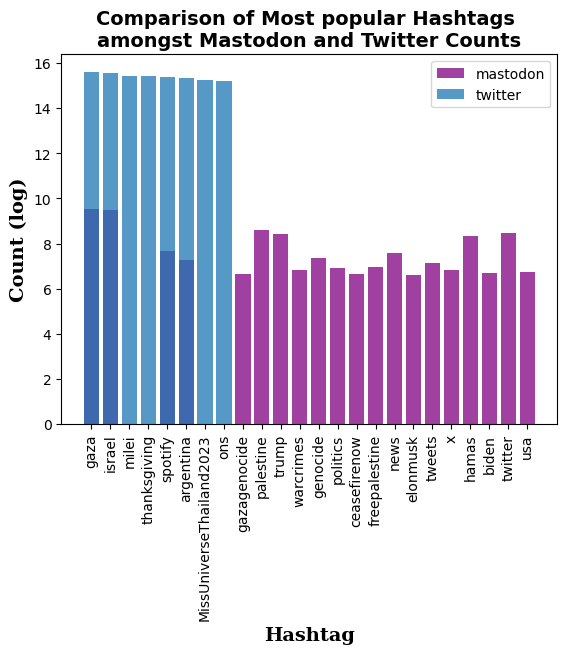

In [44]:
# Combine arrays into a list of tuples
combined_data = list(zip(tags_combined, count_mastodon, count_twitter))

# Sort the list of tuples based on the count_twitter values (descending order)
sorted_data = sorted(combined_data, key=lambda x: x[2], reverse=True)

# Unzip the sorted data back into separate arrays
sorted_tags_combined, sorted_count_mastodon, sorted_count_twitter = zip(*sorted_data)

plt.figure()
plt.bar(x=sorted_tags_combined, height=sorted_count_mastodon, color='purple', alpha=.75)
plt.bar(x=sorted_tags_combined, height=sorted_count_twitter, alpha=.75)
plt.xticks(rotation=90)
plt.legend(['mastodon','twitter'])
font_dict = {'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'serif'}
plt.xlabel('Hashtag', fontdict=font_dict)
plt.ylabel('Count (log)', fontdict=font_dict)
plt.title('Comparison of Most popular Hashtags \namongst Mastodon and Twitter Counts', fontsize= 14, fontweight= 'bold')
plt.show()

### Daily Posts Trend for Hashtag #milei

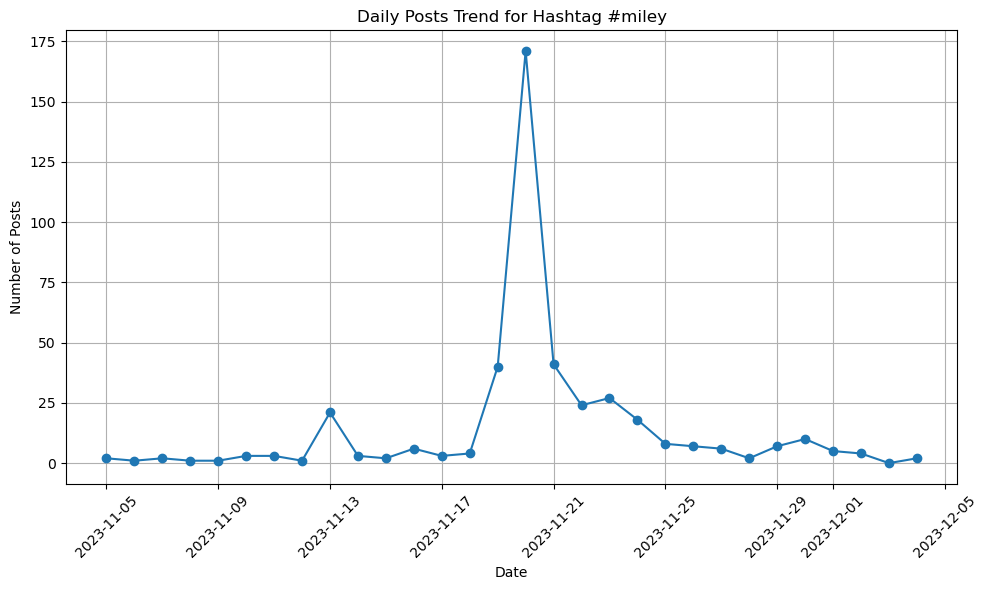

In [22]:
df_milei=pd.read_csv('./data/milei.csv')

df_milei['created_at'] = pd.to_datetime(df_milei['created_at'])

# Resample to get daily counts
daily_counts = df_milei.resample('D', on='created_at').count()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(daily_counts['id'], marker='o', linestyle='-')
plt.title('Daily Posts Trend for Hashtag #miley')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/b_/kp_80m4j1c31g3yky48_ftdc0000gn/T/ipykernel_94576/3914350869.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



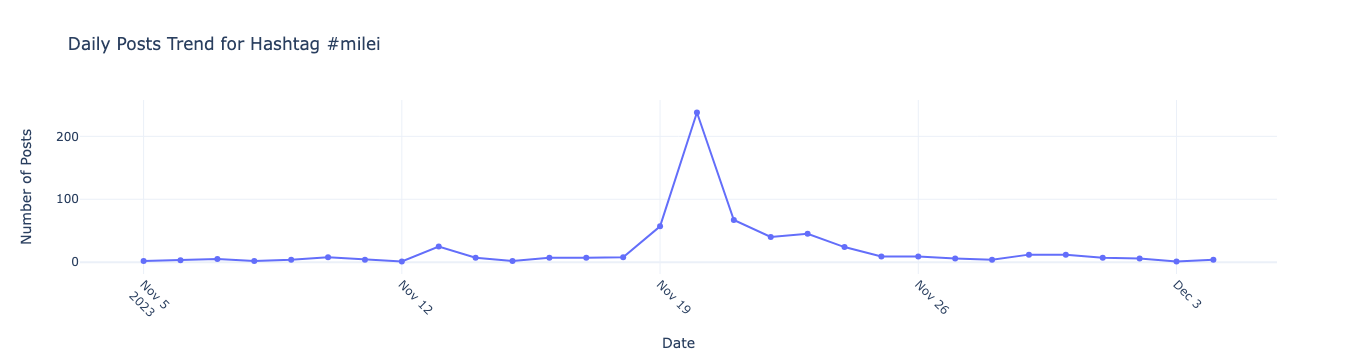

In [45]:
import plotly.graph_objects as go
import pandas as pd

mastodon_final = pd.read_csv('./data/mastodon_final_nodup.csv')

tag_of_interest = 'milei'
df = mastodon_final[mastodon_final['tags'].str.contains(tag_of_interest, case=False, na=False)]

# Convert 'created_at' to datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Resample to get daily counts
daily_counts = df.resample('D', on='created_at').count()

# Create Plotly figure
fig = go.Figure()

# Add scatter (line plot) to the figure
fig.add_trace(go.Scatter(x=daily_counts.index, 
                         y=daily_counts['id'], 
                         mode='lines+markers', 
                         name='posts'))

# Update title and axis 
fig.update_layout(
    title='Daily Posts Trend for Hashtag #milei',
    xaxis_title='Date',
    yaxis_title='Number of Posts',
    xaxis=dict(tickangle=45),
    template="plotly_white"  
)

fig.show()


TODO

* Analyse all hastags individually, check when posts with hashtags were most active.
* Find reasons for this: e.g. is it due to events like elections?
* Make it pretty :) highlight important events with colors, or arrows or whatever suitable 


RESULTS/FINDINGS

* 

### User Engagement Analysis

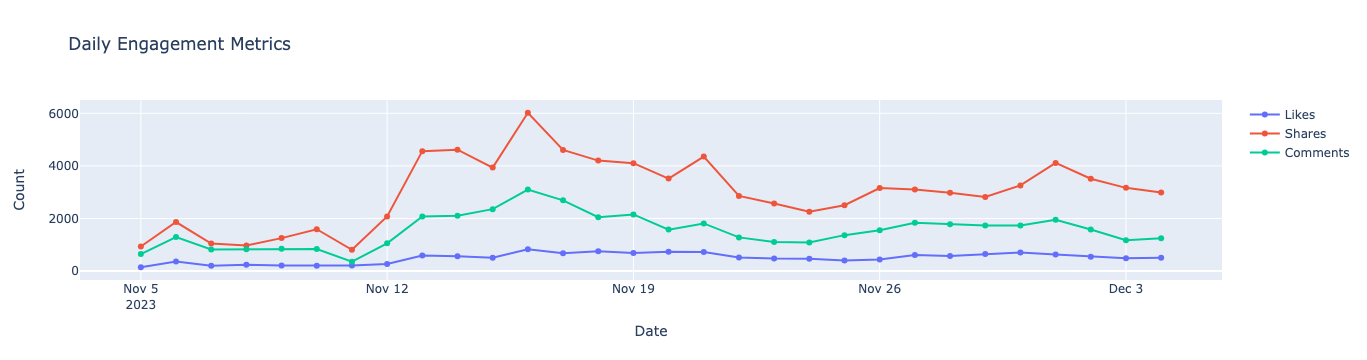

KeyError: 'followers_count'

In [25]:
import pandas as pd
import plotly.graph_objects as go

df_list_final = pd.read_csv('mastodon_final_nodup.csv')

# Convert 'created_at' to datetime
df_list_final['created_at'] = pd.to_datetime(df_list_final['created_at'])

# Resample to get daily engagement metrics
daily_engagement = df_list_final.resample('D', on='created_at').sum()

# Plotting using Plotly graph_objects
fig = go.Figure()

# Add traces for likes, shares, and comments
fig.add_trace(go.Scatter(x=daily_engagement.index, y=daily_engagement['replies_count'], mode='lines+markers', name='Likes'))
fig.add_trace(go.Scatter(x=daily_engagement.index, y=daily_engagement['reblogs_count'], mode='lines+markers', name='Shares'))
fig.add_trace(go.Scatter(x=daily_engagement.index, y=daily_engagement['favourites_count'], mode='lines+markers', name='Comments'))

# Update layout
fig.update_layout(
    title='Daily Engagement Metrics',
    xaxis_title='Date',
    yaxis_title='Count'
)

fig.show()

# Follower growth analysis
fig_follower = go.Figure()

# Add trace for follower count
fig_follower.add_trace(go.Scatter(x=df_list_final['created_at'], y=df_list_final['followers_count'], mode='lines+markers', name='Followers'))

# Update layout
fig_follower.update_layout(
    title='Follower Growth Over Time',
    xaxis_title='Date',
    yaxis_title='Follower Count'
)

fig_follower.show()

### Language Distribution Analysis


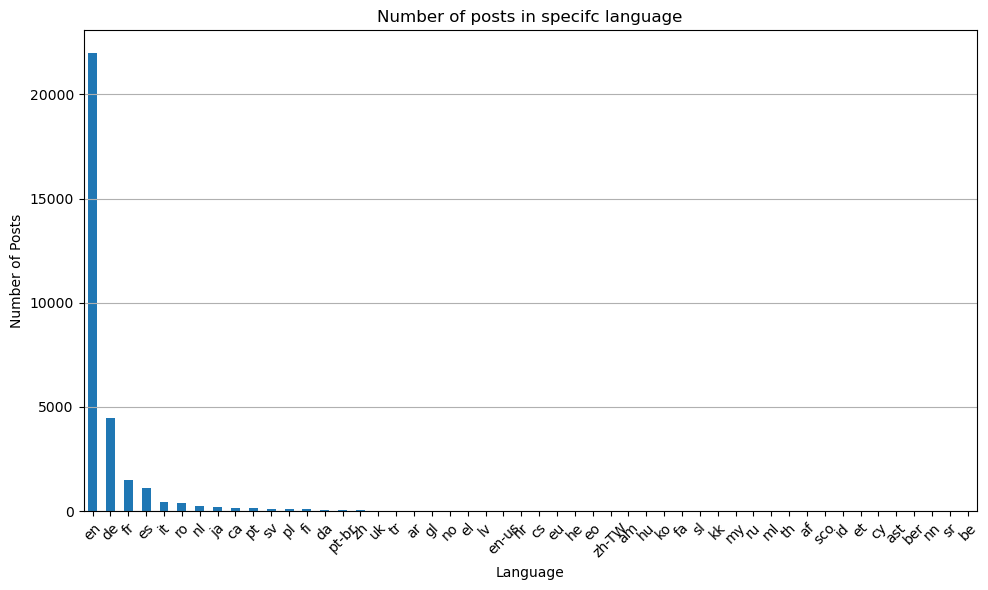

In [11]:
# Select data

df_list_final=pd.read_csv('mastodon_final_nodup.csv')

language_distribution = df_list_final['language'].value_counts()

# Plotting 
plt.figure(figsize=(10, 6))

language_distribution.plot(kind='bar')
plt.title('Number of posts in specifc language')
plt.xlabel('Language')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

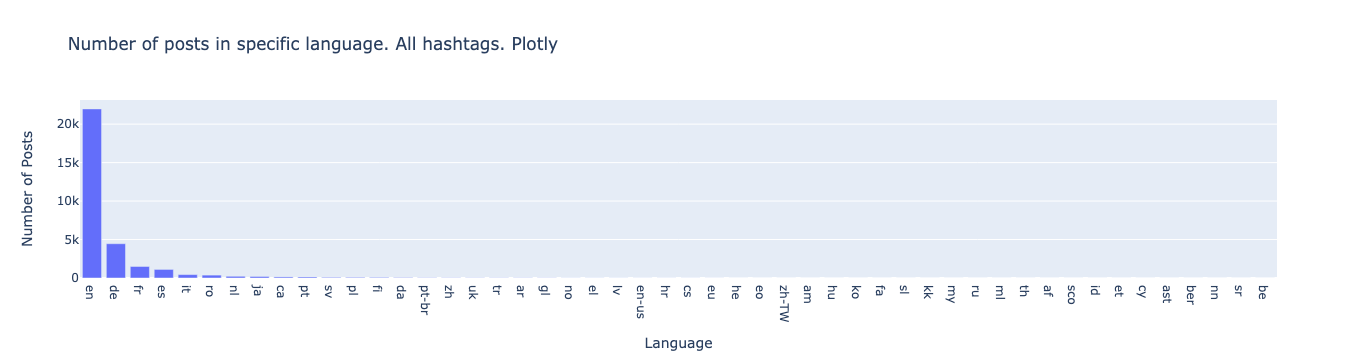

In [12]:
# Select data
language_distribution = df_list_final['language'].value_counts()

# Create a bar chart
bar_chart = go.Bar(x=language_distribution.index, y=language_distribution.values)

# Define the layout
layout = go.Layout(
    title='Number of posts in specific language. All hashtags. Plotly',
    xaxis=dict(title='Language'),
    yaxis=dict(title='Number of Posts'),
)

# Create a figure
fig = go.Figure(data=[bar_chart], layout=layout)

# Show the figure
fig.show()

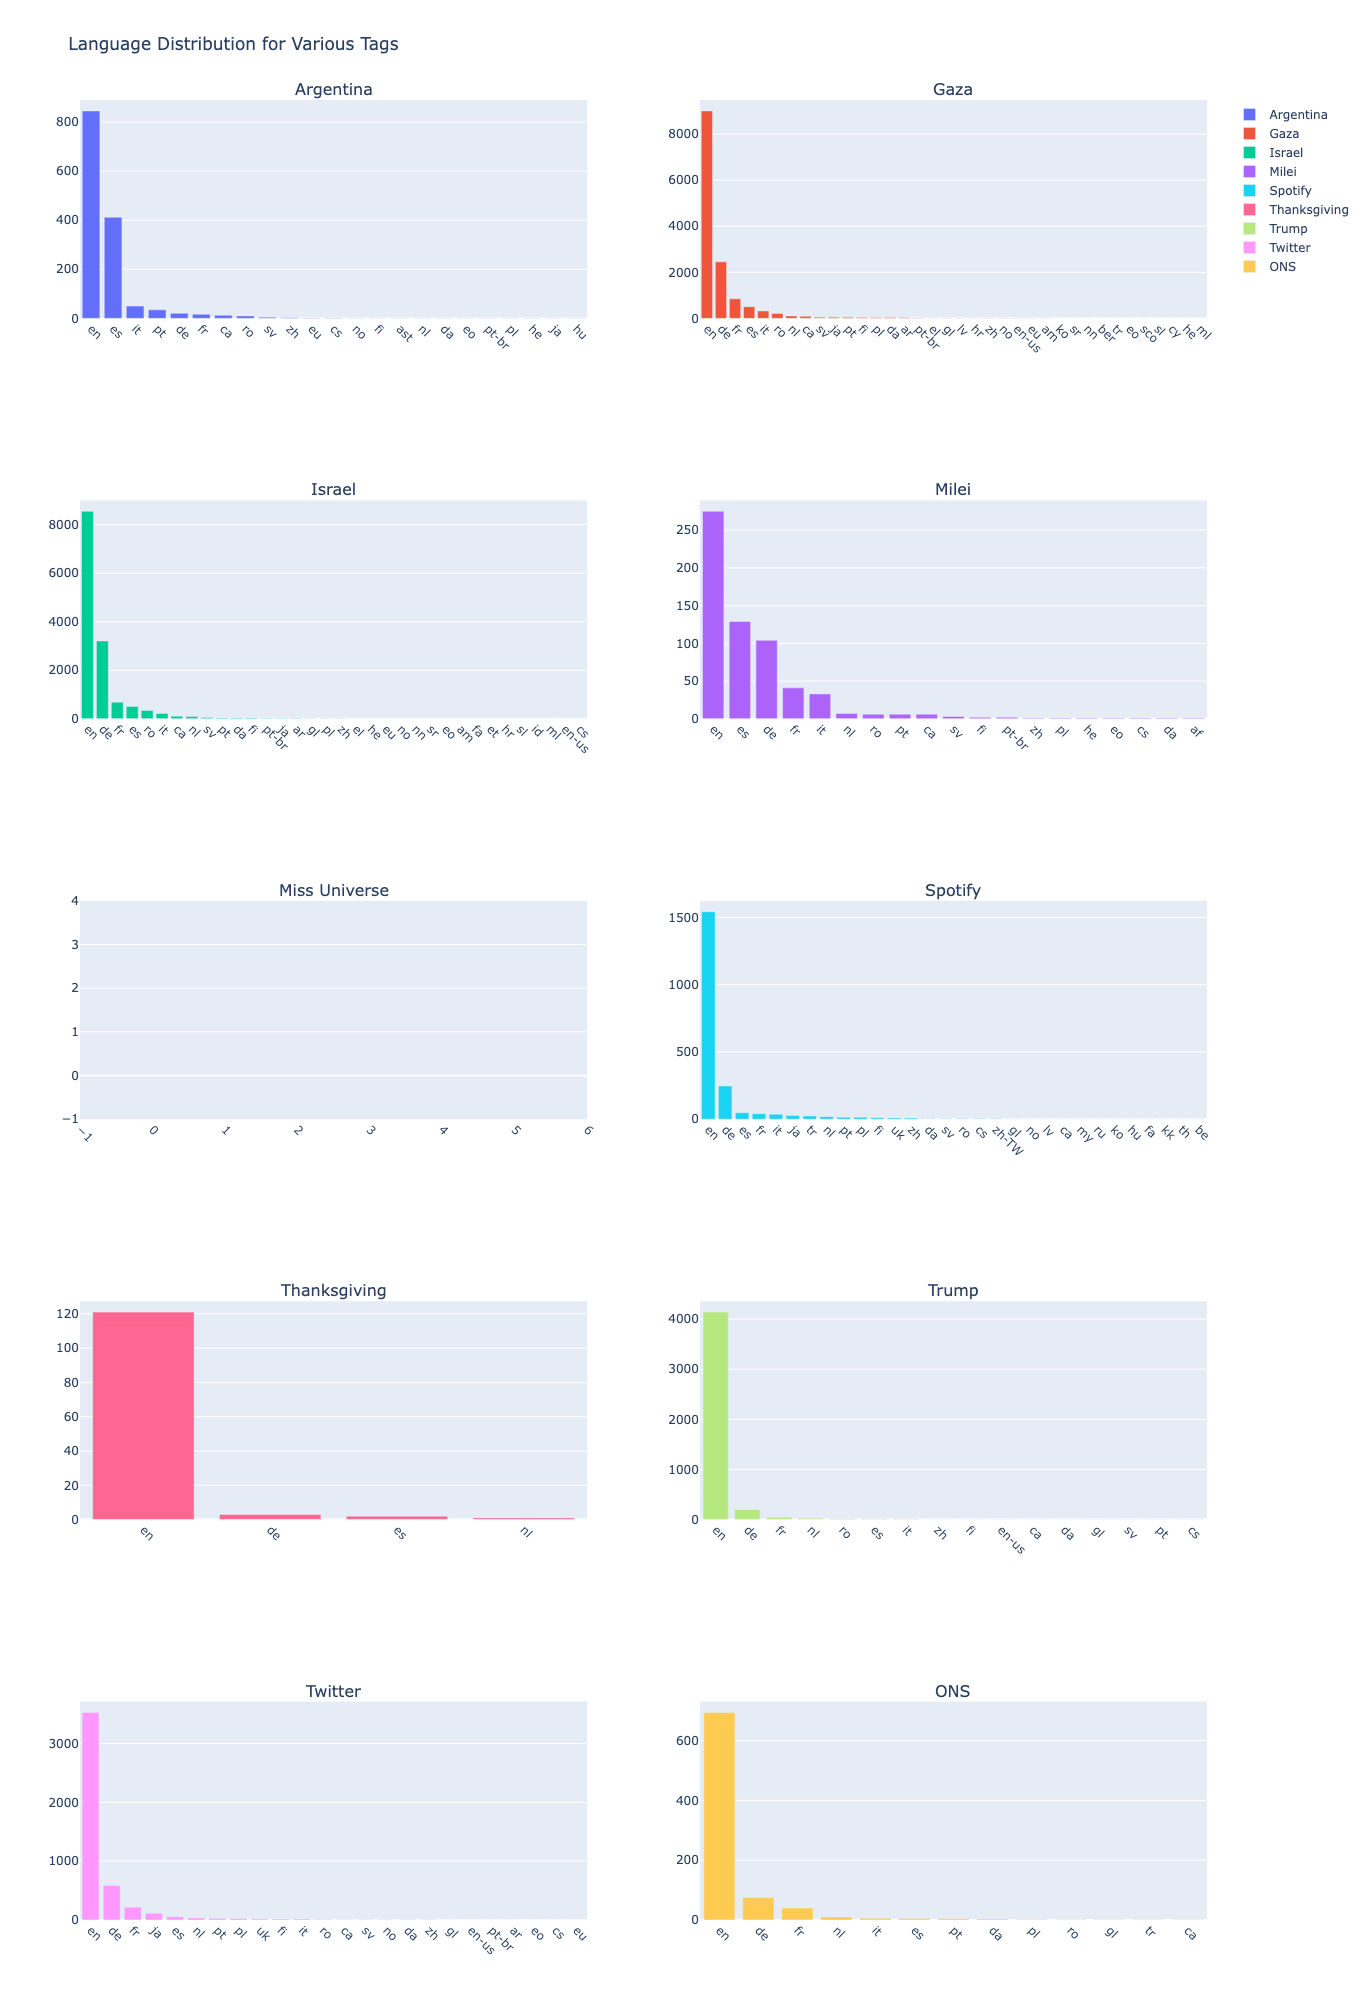

In [30]:
'''Do the log on the subplots '''
# np.log(df_gaza['language'].value_counts())

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Assuming you have a single DataFrame
mastodon_final = pd.read_csv('mastodon_final_nodup.csv')

# Tags for filtering
tags = ['Argentina', 'Gaza', 'Israel', 'Milei', 'Miss Universe', 'Spotify', 'Thanksgiving', 'Trump', 'Twitter', 'ONS']

# Titles for each subplot
subplot_titles = ['Argentina', 'Gaza', 'Israel', 'Milei', 'Miss Universe', 'Spotify', 'Thanksgiving', 'Trump', 'Twitter', 'ONS']

# Create a subplot grid: 5 rows, 2 columns
fig = make_subplots(rows=5, cols=2, subplot_titles=subplot_titles)

# Iterate through the list of tags and create subplots
for i, (tag, title) in enumerate(zip(tags, subplot_titles), start=1):
    # Filter DataFrame based on the tag
    df = mastodon_final[mastodon_final['tags'].str.contains(tag, case=False, na=False)]
    
    # Calculate language distribution for the filtered DataFrame
    language_distribution = df['language'].value_counts()
    
    row = (i-1) // 2 + 1  # Determine the row
    col = i % 2 if i % 2 != 0 else 2  # Determine the column

    # Create a bar chart for each tag
    fig.add_trace(
        go.Bar(x=language_distribution.index, y=language_distribution.values, name=title),
        row=row, col=col
    )

# Update layout if necessary
fig.update_layout(height=2000, width=1000, title_text="Language Distribution for Various Tags", showlegend=True)
fig.update_xaxes(tickangle=45)

# Show the figure
fig.show()

### Sentiment Analysis 

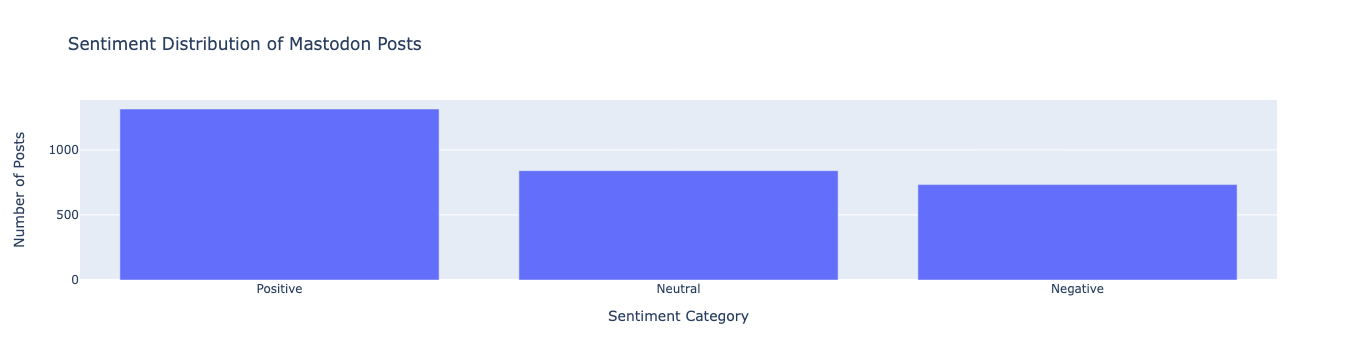

In [32]:
df_sentiments=pd.read_csv('mastodon_sentiment.csv')

# Visualization
sentiment_counts = df_sentiments['sentiment'].value_counts()

# Create a Plotly bar chart
fig = go.Figure([go.Bar(x=sentiment_counts.index, y=sentiment_counts.values)])

# Update layout for title and axis labels
fig.update_layout(
    title='Sentiment Distribution of Mastodon Posts',
    xaxis_title='Sentiment Category',
    yaxis_title='Number of Posts'
)

# Show the plot
fig.show()

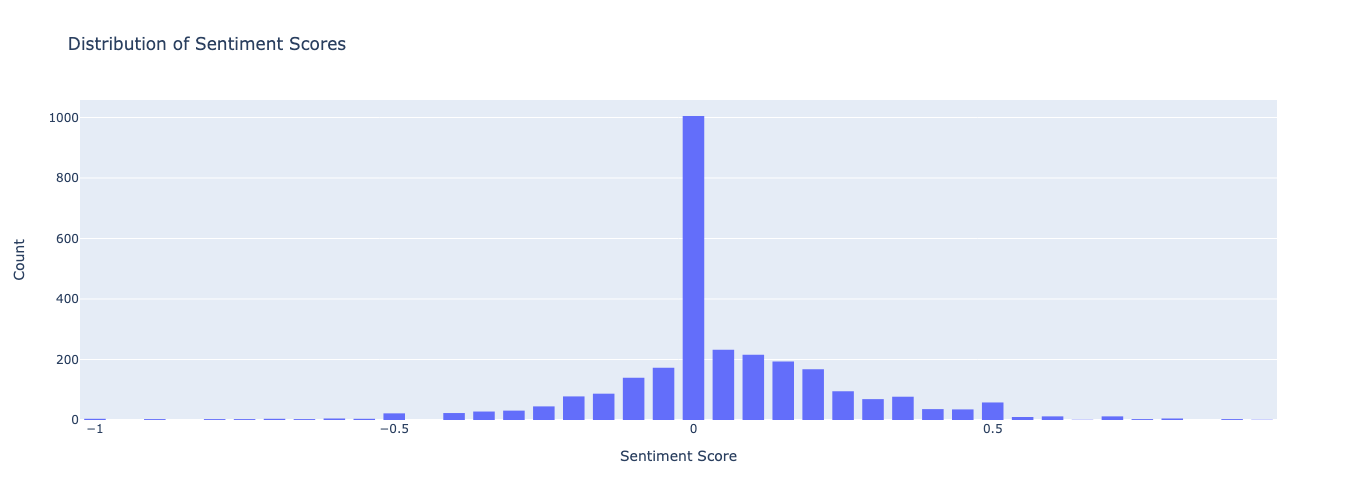

In [33]:
# Let's create a histogram of sentiment scores
fig = go.Figure(data=[go.Histogram(x=df_sentiments['sentiment_score'], nbinsx=50,)])

# Update layout 
fig.update_layout(
    title_text='Distribution of Sentiment Scores', 
    xaxis_title_text='Sentiment Score', 
    yaxis_title_text='Count', 
    bargap=0.2, 
    bargroupgap=0.1, # gap between bars of the same location coordinates
    height=500
)

fig.show()

# Word Clouds

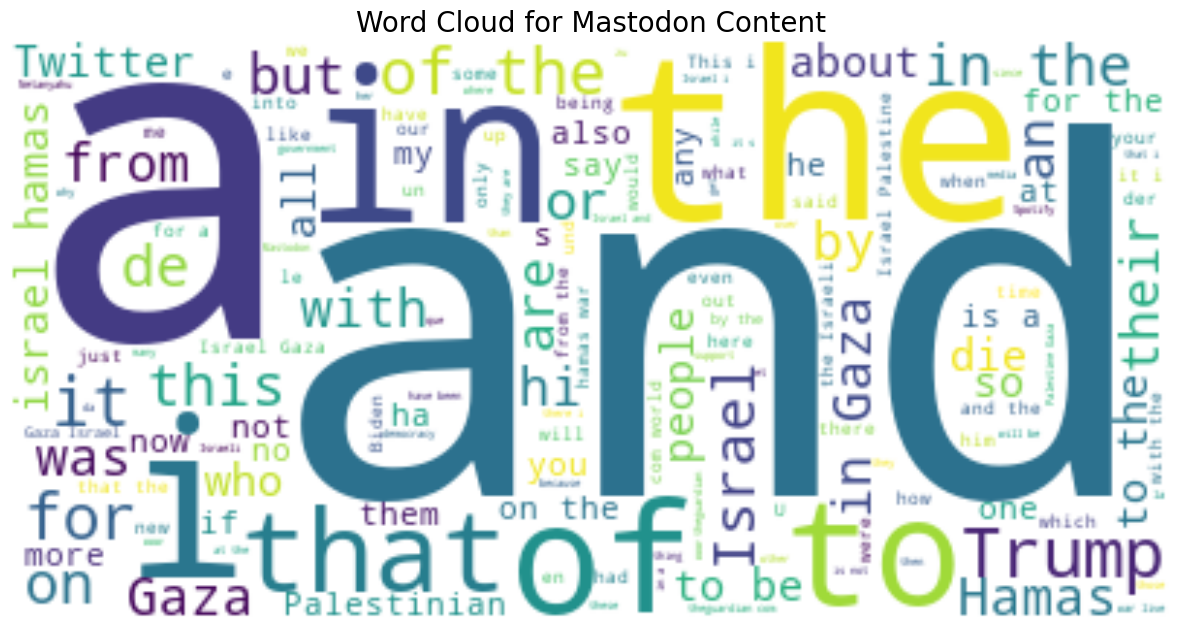

In [34]:
# Since the dataframe is already clean, we can directly create a text string for the word cloud.
text = " ".join(review for review in df_sentiments.content.astype(str))

# List of words to exclude
stopwords=set(['https'])

# Create and generate a word cloud image
wordcloud = WordCloud(background_color="white",stopwords=stopwords).generate(text)

# Display the generated image using matplotlib
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Mastodon Content', fontsize=20)
plt.axis('off')  # turn off axis
plt.show()

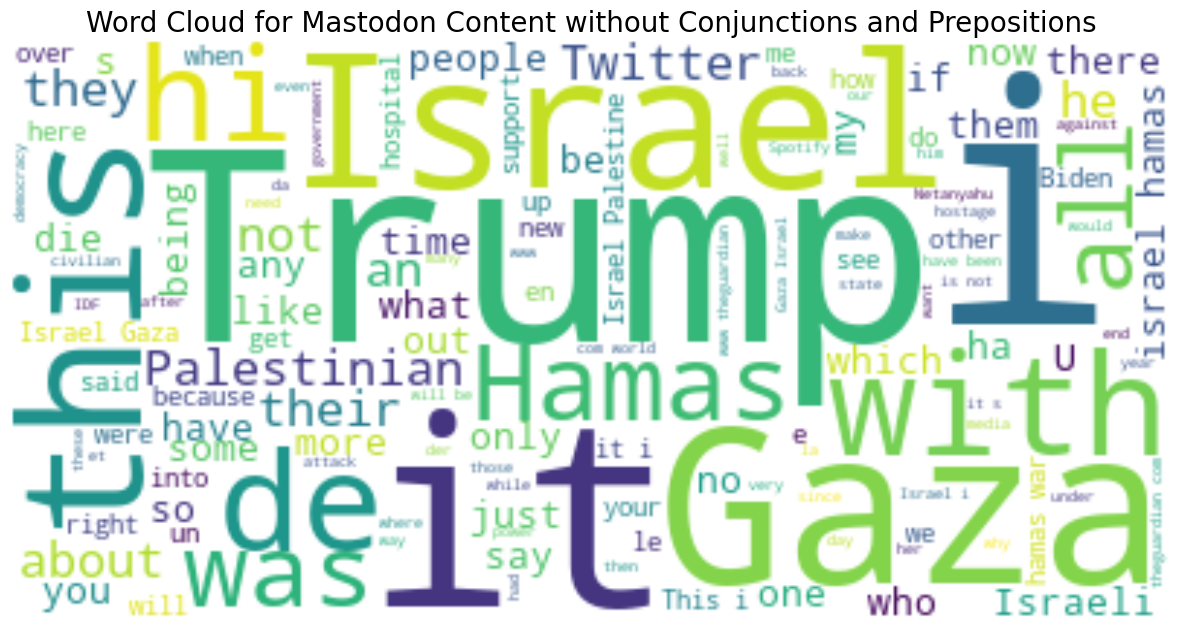

In [63]:
# Since the dataframe is already clean, we can directly create a text string for the word cloud.
text = " ".join(review for review in df_sentiments.content.astype(str))

# List of words to exclude
stopwords=set(['https','that','or','but','on','by','also','at','und','and','to','the','in','of','a','for','are','from','as'])

# Create and generate a word cloud image
wordcloud_no_conjunctions_prepositions = WordCloud(background_color="white",stopwords=stopwords).generate(text)

# Display the generated image using matplotlib
plt.figure(figsize=(15,10))
plt.imshow(wordcloud_no_conjunctions_prepositions, interpolation='bilinear')
plt.title('Word Cloud for Mastodon Content without Conjunctions and Prepositions', fontsize=20)
plt.axis('off')  # turn off axis
plt.show()

# User Demographics and Behavior

In [82]:
import pandas as pd

# Load data
mastodon_final = pd.read_csv('mastodon_final_nodup.csv')
mastodon_final_cleaned = pd.read_csv('mastodon_final_v2_nodup.csv')

# User Demographics and Behavior
user_demographics_behavior = mastodon_final[['account.id', 'account.username', 'account.display_name', 'account.bot', 'account.created_at', 'account.followers_count', 'account.following_count', 'account.statuses_count', 'account.last_status_at']]

# Total most active users
most_active_users = user_demographics_behavior.sort_values(by='account.statuses_count', ascending=False).head(10)

# Analysis of profile statistics and behavior
profile_analysis = user_demographics_behavior.describe()

# Check for bots
bots_accounts = mastodon_final[['account.username', 'account.bot']].groupby(['account.bot']).count()

# Display results
print("User Demographics and Behavior:")
print(user_demographics_behavior.head())

print("\nTotal Most Active Users:")
print(most_active_users)

print("\nProfile Statistics and Behavior Analysis:")
print(profile_analysis)

print("\nAnalysis of Bots:")
print(bots_accounts)

User Demographics and Behavior:
           account.id account.username account.display_name  account.bot  \
0  109522427936071841          mreader          Mike Reader        False   
1  109470773270955555             emsc     AllQuakes - EMSC         True   
2  109470773270955555             emsc     AllQuakes - EMSC         True   
3  108950626336567355            fanta             fanta ☑️        False   
4  109943696965534606    janettespeyer        JanetteSpeyer        False   

         account.created_at  account.followers_count  account.following_count  \
0  2022-12-16T00:00:00.000Z                      184                      562   
1  2022-11-23T00:00:00.000Z                     1008                        0   
2  2022-11-23T00:00:00.000Z                     1008                        0   
3  2022-09-06T00:00:00.000Z                     6488                     5683   
4  2023-02-28T00:00:00.000Z                      327                      295   

   account.statuses_coun

In [69]:
# Load data
mastodon_final = pd.read_csv('mastodon_final_nodup.csv')
mastodon_final_cleaned = pd.read_csv('mastodon_final_v2_nodup.csv')

# User Demographics and Behavior
user_demographics_behavior = mastodon_final_cleaned[['account.id', 'account.username', 'account.display_name', 'account.bot', 'account.created_at', 'account.followers_count', 'account.following_count', 'account.statuses_count', 'account.last_status_at']]

# Total most active users
most_active_users = user_demographics_behavior.sort_values(by='account.statuses_count', ascending=False).head(10)

# Analysis of profile statistics and behavior
profile_analysis = user_demographics_behavior.describe()

# Check for bots
bots_accounts_cleaned = mastodon_final_cleaned[['account.username', 'account.bot']].groupby(['account.bot']).count()

# Display results
print("User Demographics and Behavior:")
print(user_demographics_behavior.head())

print("\nTotal Most Active Users:")
print(most_active_users)

print("\nProfile Statistics and Behavior Analysis:")
print(profile_analysis)

print("\nAnalysis of Bots:")
print(bots_accounts_cleaned)

User Demographics and Behavior:
           account.id account.username account.display_name  account.bot  \
0  108950626336567355            fanta             fanta ☑️        False   
1              508125         danddv77  Daniel🔻Es/Mx :fedi:        False   
2  110159867477434197         MaryRead             MaryRead        False   
3  110159867477434197         MaryRead             MaryRead        False   
4             1015318        PinkWhale         Pink Whale 💚        False   

         account.created_at  account.followers_count  account.following_count  \
0  2022-09-06T00:00:00.000Z                     6488                     5683   
1  2018-08-30T00:00:00.000Z                      688                      486   
2  2023-04-07T00:00:00.000Z                      241                      167   
3  2023-04-07T00:00:00.000Z                      241                      167   
4  2019-11-28T00:00:00.000Z                       82                       86   

   account.statuses_coun

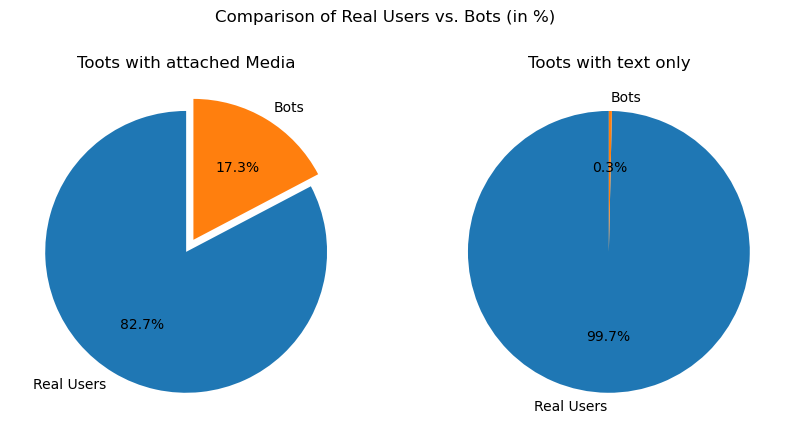

In [115]:
explode = (0, 0.1)

# Data for the first pie chart
labels1 = 'Real Users', 'Bots'
sizes1 = [bots_accounts.iloc[0, 0], bots_accounts.iloc[1, 0]]

# Data for the second pie chart
labels2 = 'Real Users', 'Bots'
sizes2 = [bots_accounts_cleaned.iloc[0, 0], bots_accounts_cleaned.iloc[1, 0]]

# Create subplots with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first pie chart on the left subplot (ax1)
ax1.pie(sizes1, labels=labels1, autopct='%1.1f%%', startangle=90,explode=explode)
ax1.set_title('Toots with attached Media')

# Plot the second pie chart on the right subplot (ax2)
ax2.pie(sizes2, labels=labels2, autopct='%1.1f%%', startangle=90)
ax2.set_title('Toots with text only')

plt.suptitle('Comparison of Real Users vs. Bots (in %)')

# Display the subplots
plt.show()

# Accounts over time

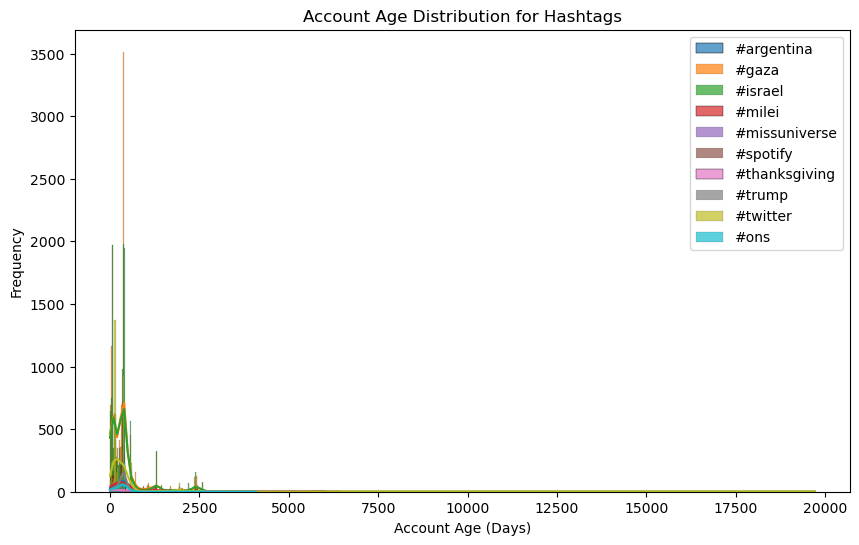

In [67]:
import seaborn as sns

# Load data
mastodon_final = pd.read_csv('mastodon_final_nodup.csv')

# Convert 'created_at' to datetime if not already and localize to UTC
mastodon_final['account.created_at'] = pd.to_datetime(mastodon_final['account.created_at'], utc=True)

# Calculate account ages
mastodon_final['account_age'] = (pd.to_datetime('today', utc=True) - mastodon_final['account.created_at']).dt.days

# Plot age distribution
plt.figure(figsize=(10, 6))
for hashtag in ['argentina', 'gaza', 'israel', 'milei', 'missuniverse', 'spotify', 'thanksgiving', 'trump', 'twitter', 'ons']:
    hashtag_df = mastodon_final[mastodon_final['tags'].str.contains(hashtag, case=False, na=False)]
    sns.histplot(hashtag_df['account_age'], kde=True, label=f'#{hashtag}', alpha=0.7)

plt.title('Account Age Distribution for Hashtags')
plt.xlabel('Account Age (Days)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

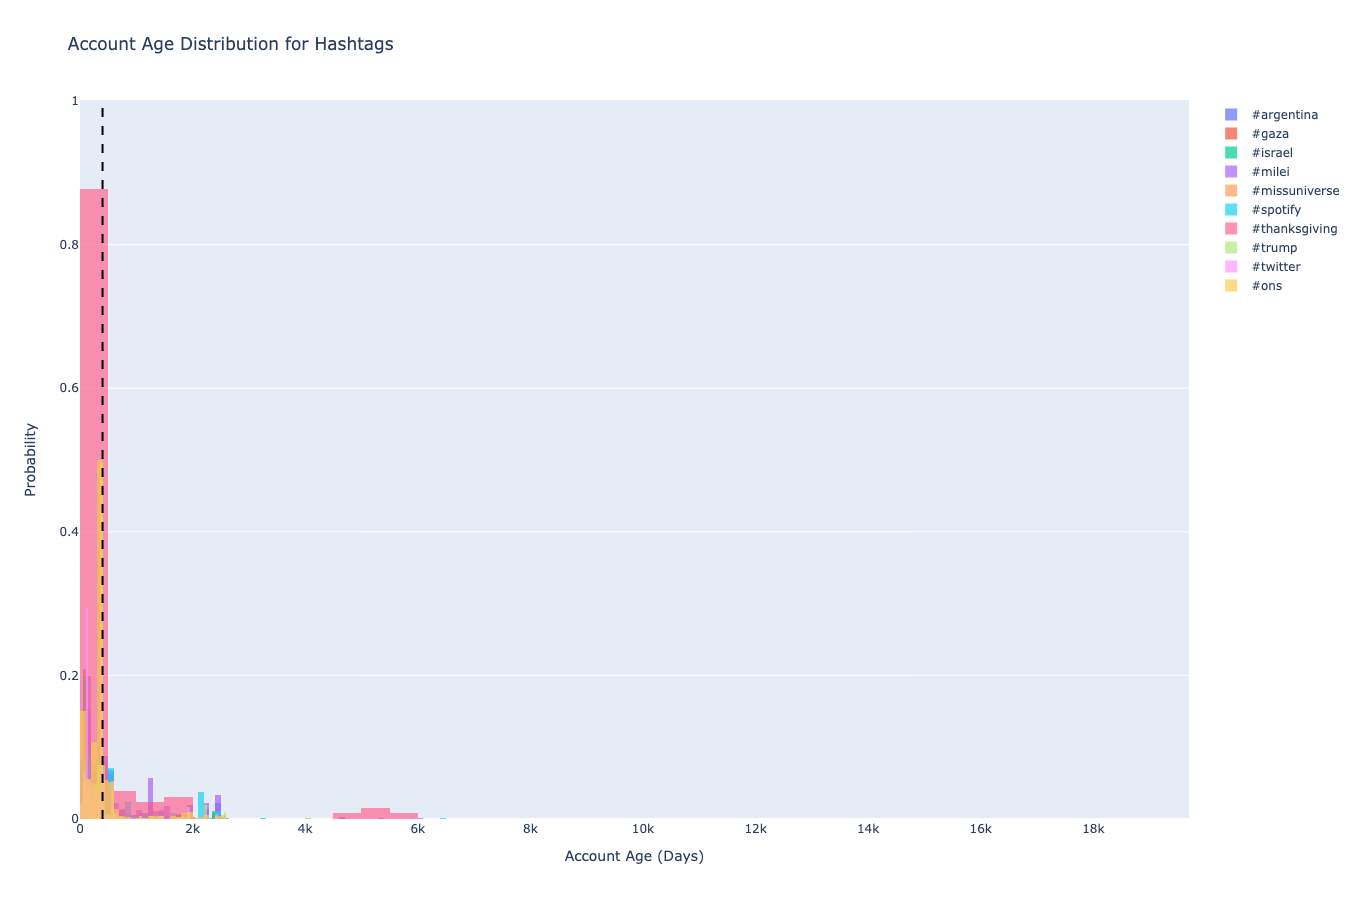

In [15]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Load data
mastodon_final = pd.read_csv('mastodon_final_nodup.csv')

# Convert 'created_at' to datetime if not already and localize to UTC
mastodon_final['account.created_at'] = pd.to_datetime(mastodon_final['account.created_at'], utc=True)

# Calculate account ages
mastodon_final['account_age'] = (pd.to_datetime('today', utc=True) - mastodon_final['account.created_at']).dt.days

# Create a figure
fig = go.Figure()

# Add histograms for each hashtag
for hashtag in ['argentina', 'gaza', 'israel', 'milei', 'missuniverse', 'spotify', 'thanksgiving', 'trump', 'twitter', 'ons']:
    hashtag_df = mastodon_final[mastodon_final['tags'].str.contains(hashtag, case=False, na=False)]
    fig.add_trace(go.Histogram(
        x=hashtag_df['account_age'],
        opacity=0.7,
        name=f'#{hashtag}',
        histnorm='probability',
    ))

# Add a vertical line at 400 days
fig.add_shape(
    type='line',
    x0=400,
    x1=400,
    y0=0,
    y1=1,
    line=dict(color='black', width=2, dash='dash'),
)

# Update layout
fig.update_layout(
    title='Account Age Distribution for Hashtags',
    xaxis_title='Account Age (Days)',
    yaxis_title='Probability',
    barmode='overlay',
    height=900
)

# Show plot
fig.show()

# User Network Analysis

In [94]:
# Initialize a directed graph
G = nx.DiGraph()

In [97]:
# Iterate through each row in the DataFrame
for idx, row in df.iterrows():
    user = row['account.username']  # User who made the post
    mention = row['mentions']       # User mentioned in the post
    reblog = row['reblogs_count']   # Indicates if the post is a reblog
    replied_to = row['in_reply_to_account_id']  # Original poster if this post is a reply

    # Add nodes for users
    if user not in G:
        G.add_node(user)
    if mention and mention not in G:
        G.add_node(mention)

    # Add edges for interactions
    if pd.notna(mention):
        G.add_edge(user, mention, interaction='mention')
    
    # Assuming a reblog is indicated by a non-zero reblogs_count
    if reblog > 0 and pd.notna(replied_to):
        G.add_edge(replied_to, user, interaction='reblog')

In [98]:
# Calculate Degree Centrality for each node
centrality = nx.degree_centrality(G)


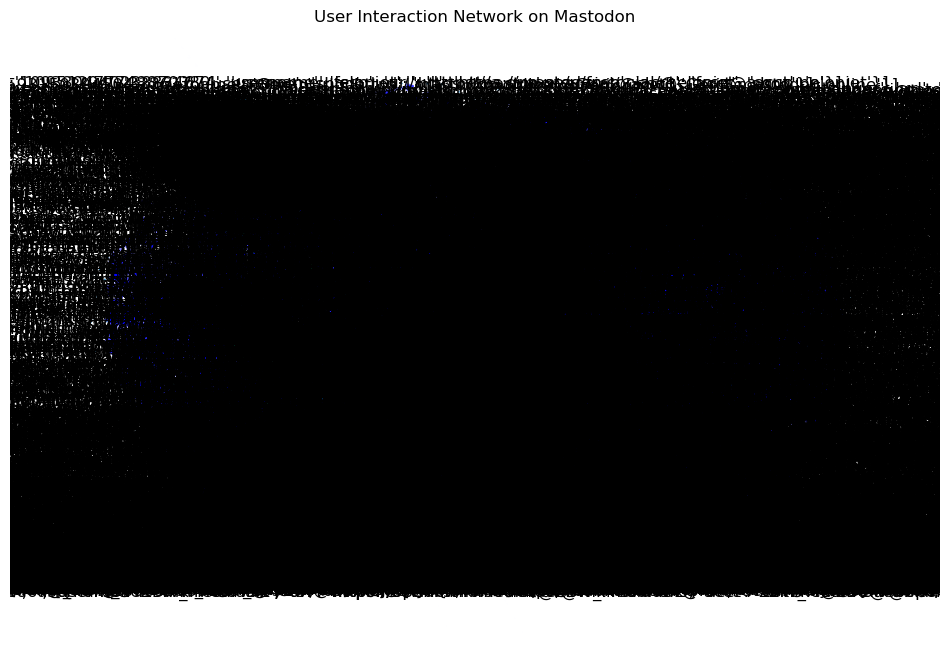

In [100]:
# Visualization
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # Define the layout for nodes

# Draw nodes, with size based on centrality
nx.draw_networkx_nodes(G, pos, node_size=[v * 1000 for v in centrality.values()])

# Draw edges for mentions in blue
nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for u, v, d in G.edges(data=True) if d['interaction'] == 'mention'],
                       width=2, alpha=0.5, edge_color='blue')

# Draw edges for reblogs in green
nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for u, v, d in G.edges(data=True) if d['interaction'] == 'reblog'],
                       width=2, alpha=0.5, edge_color='green')

# Add labels for each node
nx.draw_networkx_labels(G, pos, font_size=12)

# Set the title and turn off the axis
plt.title("User Interaction Network on Mastodon")
plt.axis('off')
plt.show()


In [102]:
# Initialize a directed graph
G = nx.DiGraph()

In [114]:
# Iterate through each row in the DataFrame
for idx, row in df_cleaned.iterrows():
    user = row['account.username']  # User who made the post
    mention = row['mentions']       # User mentioned in the post
    reblog = row['reblogs_count']   # Indicates if the post is a reblog
    replied_to = row['in_reply_to_account_id']  # Original poster if this post is a reply

    # Add nodes for users
    if user not in G:
        G.add_node(user)
    if mention and mention not in G:
        G.add_node(mention)

    # Add edges for interactions
    if pd.notna(mention):
        G.add_edge(user, mention, interaction='mention')
    
    # Assuming a reblog is indicated by a non-zero reblogs_count
    if reblog > 0 and pd.notna(replied_to):
        G.add_edge(replied_to, user, interaction='reblog')

In [115]:
# Calculate Degree Centrality for each node
centrality = nx.degree_centrality(G)

In [119]:
# Filter nodes with degree centrality below a threshold (e.g., 0.05)
filtered_nodes = {node for node, centrality in centrality.items() if centrality >= 0.005}


In [120]:
# Create a subgraph with only the filtered nodes
H = G.subgraph(filtered_nodes)


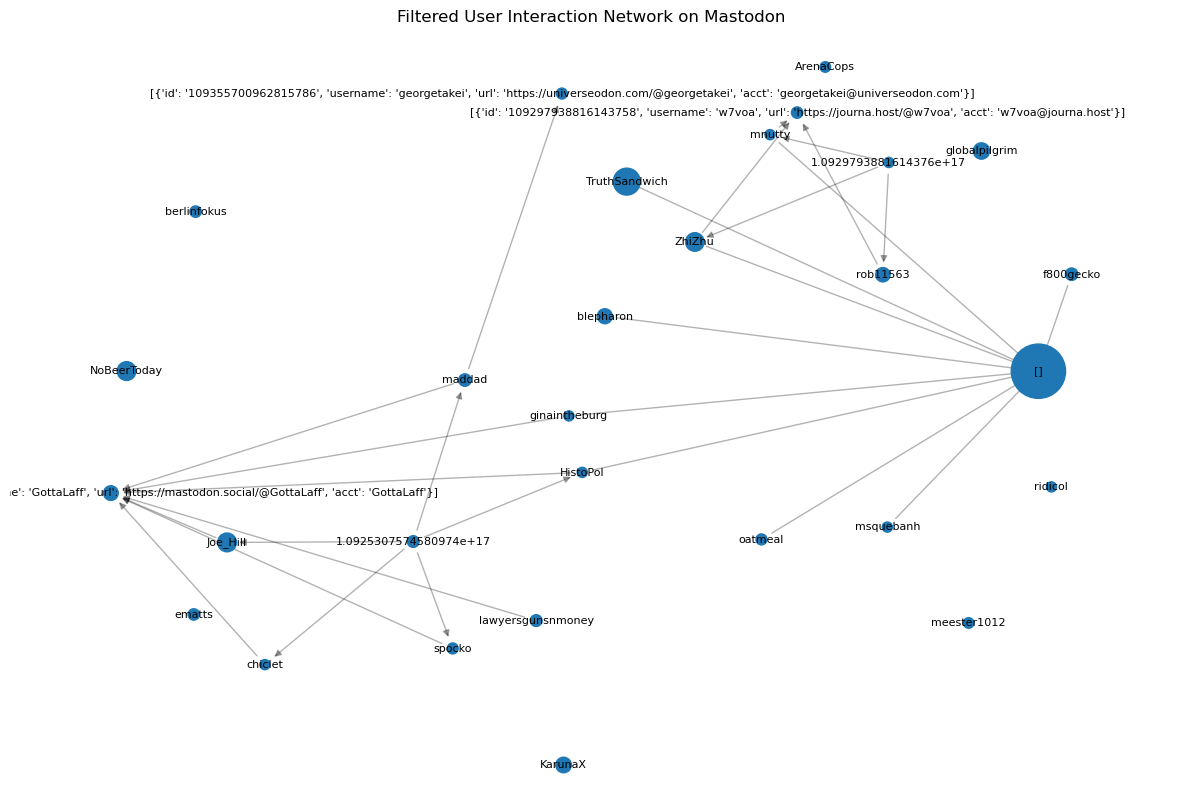

In [124]:
# Visualization
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(H, k=0.8, iterations=50)  # Adjust layout spacing with k

# Draw nodes, with size based on centrality
node_sizes = [centrality[node] * 10000 for node in H.nodes()]  # Increase node size for visibility
nx.draw_networkx_nodes(H, pos, node_size=node_sizes)

# Draw edges, using alpha to blend colors and reduce visual clutter
nx.draw_networkx_edges(H, pos, alpha=0.3)

# Add labels for each node
nx.draw_networkx_labels(H, pos, font_size=8)

# Set the title and turn off the axis
plt.title("Filtered User Interaction Network on Mastodon")
plt.axis('off')
plt.show()

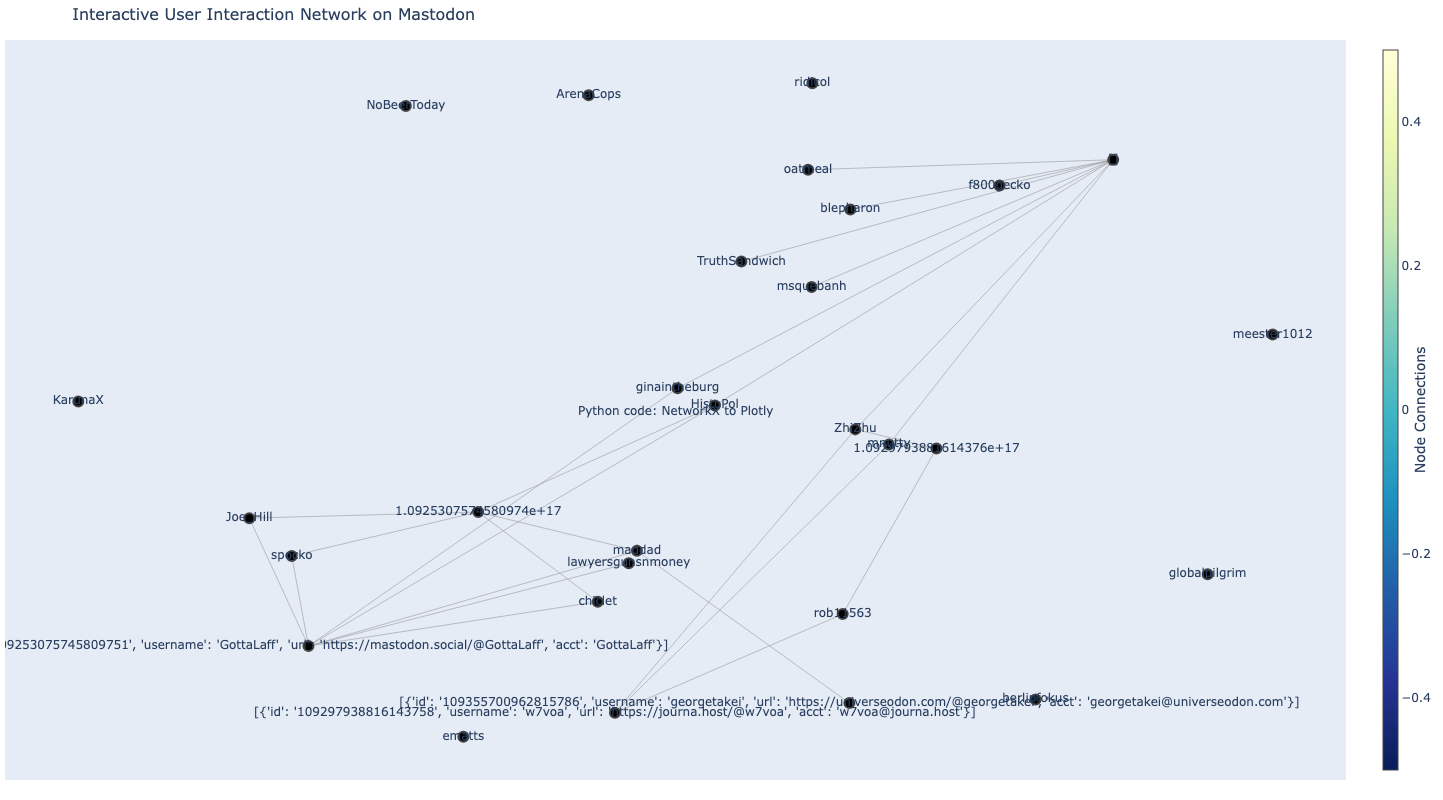

In [138]:
# Position nodes using one of the graph layout algorithms
pos = nx.spring_layout(H, k=0.5)

# Create Edges
edge_x = []
edge_y = []
for edge in H.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

# Create Nodes
node_x = []
node_y = []
text = []
for node in H.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    # Here you can add more detailed information within the hovertext
    text.append(f"{node}<br>Centrality: {centrality[node]:.4f}")

# Create figure
fig = go.Figure()

# Add edges as scatter trace
fig.add_trace(go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'))

# Add nodes as scatter trace
fig.add_trace(go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    text=[node for node in H.nodes()],  # Just the usernames for node labels
    hovertext=text,  # Detailed information, including centrality, for hover
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2)))

# Update layout
fig.update_layout(
    title='Interactive User Interaction Network on Mastodon',
    titlefont_size=16,
    width=1200,  
    height=800,
    showlegend=False,
    hovermode='closest',
    margin=dict(b=20,l=5,r=5,t=40),
    annotations=[dict(
        text="Python code: NetworkX to Plotly",
        showarrow=False,
        xref="paper", yref="paper")],
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
)

fig.show()